In [1]:
#импорт библиотек
import pandas as pd     #инструмент анализа и манипулирования c данными

import numpy as np      #массивы, матрицы и математика
import torch            #тензорные вычисления

import sklearn as sk    #бибоиотека алгоритмов машинного обучения
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

import matplotlib.pyplot as plt #графики
import seaborn as sns   #визуализация
import plotly.express as px #визуализация
import plotly.graph_objects as go

Машинное обучение

Задача регрессии

Предсказание цены на подеражанные автомобили
на датасете: https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices


In [2]:
#загрузка датасета
#датасет объявлений с продажей подержанных автомобилей
df=pd.read_csv('autos.csv')

In [3]:
#посмотрим на структуру датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
#посмотрим на данные
df

index          dateCrawled  \
0            0  2016-03-24 11:52:17   
1            1  2016-03-24 10:58:45   
2            2  2016-03-14 12:52:21   
3            3  2016-03-17 16:54:04   
4            4  2016-03-31 17:25:20   
...        ...                  ...   
371523  371523  2016-03-14 17:48:27   
371524  371524  2016-03-05 19:56:21   
371525  371525  2016-03-19 18:57:12   
371526  371526  2016-03-20 19:41:08   
371527  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371526                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType  yearOfRegistration    gearbox  ...        model  \
0          test         NaN                1993    manuell  ...         golf   
1          test       coupe                2011    manuell  ...          NaN   
2          test         suv                2004  automatik  ...        grand   
3          test  kleinwagen                2001    manuell  ...         golf   
4          test  kleinwagen                2008    manuell  ...        fabia   
...         ...         ...                 ...        ...  ...          ...   
371523     test         NaN                2005        NaN  ...          NaN   
371524     test      cabrio                2000  automatik  ...       fortwo   
371525     test         bus                1996    manuell  ...  transporter   
371526     test       kombi                2002    manuell  ...         golf   
371527  control   limousine                2013    manuell  ...      m_reihe   

       kilometer  monthOfRegistration  fuelType           brand  \
0         150000                    0    benzin      volkswagen   
1         125000                    5    diesel            audi   
2         125000                    8    diesel            jeep   
3         150000                    6    benzin      volkswagen   
4          90000                    7    diesel           skoda   
...          ...                  ...       ...             ...   
371523     20000                    1       NaN  sonstige_autos   
371524    125000                    3    benzin           smart   
371525    150000                    3    diesel      volkswagen   
371526    150000                    6    diesel      volkswagen   
371527     50000                    8    benzin             bmw   

       notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0                    NaN  2016-03-24 00:00:00            0       70435   
1                     ja  2016-03-24 00:00:00            0       66954   
2                    NaN  2016-03-14 00:00:00            0       90480   
3                   nein  2016-03-17 00:00:00            0       91074   
4                   nein  2016-03-31 00:00:00            0       60437   
...                  ...                  ...          ...         ...   
371523               NaN  2016-03-14 00:00:00            0       39576   
371524              nein  2016-03-05 00:00:00            0       26135   
371525              nein  2016-03-19 00:00:00            0       87439   
371526               NaN  2016-03-20 00:00:00            0   

In [5]:
df.describe(include='all')

index          dateCrawled         name  seller offerType  \
count   371528.000000               371528       371528  371528    371528   
unique            NaN               280500       233531       2         2   
top               NaN  2016-03-24 14:49:47  Ford_Fiesta  privat   Angebot   
freq              NaN                    7          657  371525    371516   
mean    185763.500000                  NaN          NaN     NaN       NaN   
std     107251.039743                  NaN          NaN     NaN       NaN   
min          0.000000                  NaN          NaN     NaN       NaN   
25%      92881.750000                  NaN          NaN     NaN       NaN   
50%     185763.500000                  NaN          NaN     NaN       NaN   
75%     278645.250000                  NaN          NaN     NaN       NaN   
max     371527.000000                  NaN          NaN     NaN       NaN   

               price  abtest vehicleType  yearOfRegistration  gearbox  ...  \
count   3.715280e+05  371528      333659       371528.000000   351319  ...   
unique           NaN       2           8                 NaN        2  ...   
top              NaN    test   limousine                 NaN  manuell  ...   
freq             NaN  192585       95894                 NaN   274214  ...   
mean    1.729514e+04     NaN         NaN         2004.577997      NaN  ...   
std     3.587954e+06     NaN         NaN           92.866598      NaN  ...   
min     0.000000e+00     NaN         NaN         1000.000000      NaN  ...   
25%     1.150000e+03     NaN         NaN         1999.000000      NaN  ...   
50%     2.950000e+03     NaN         NaN         2003.000000      NaN  ...   
75%     7.200000e+03     NaN         NaN         2008.000000      NaN  ...   
max     2.147484e+09     NaN         NaN         9999.000000      NaN  ...   

         model      kilometer  monthOfRegistration  fuelType       brand  \
count   351044  371528.000000        371528.000000    338142      371528   
unique     251            NaN                  NaN         7          40   
top       golf            NaN                  NaN    benzin  volkswagen   
freq     30070            NaN                  NaN    223857       79640   
mean       NaN  125618.688228             5.734445       NaN         NaN   
std        NaN   40112.337051             3.712412       NaN         NaN   
min        NaN    5000.000000             0.000000       NaN         NaN   
25%        NaN  125000.000000             3.000000       NaN         NaN   
50%        NaN  150000.000000             6.000000       NaN         NaN   
75%        NaN  150000.000000             9.000000       NaN         NaN   
max        NaN  150000.000000            12.000000       NaN         NaN   

       notRepairedDamage          dateCreated nrOfPictures    postalCode  \
count             299468               371528     371528.0  371528.00000   
unique                 2                  114          NaN           NaN   
top                 nein  2016-04-03 00:00:00          NaN           NaN   
freq              263182                14450          NaN           NaN   
mean                 NaN                  NaN          0.0   50820.66764   
std                  NaN                  NaN          0.0   25799.08247   
min                  NaN                  NaN          0.0    1067.00000   
25%                  NaN                  NaN          0.0   30459.00000   
50%                  NaN                  NaN          0.0   49610.00000   
75%                  NaN                  NaN          0.0   71546.00000   
max                  NaN                  NaN          0.0   99998.00000   

                   lastSeen  
count                371528  
unique               182806  
top     2016-04-07 06:45:59  
freq                     17  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN 

Таблица с данными содержит 371528 строк

Опишем столбцы-признаки:

1.  index               = номер объявления по порядку начиная с 0
2.  dateCrawled         = дата размещения
3.  name                = название автомобиля
4.  seller              = Тип продавца (частное объявление или диллер)
5.  offerType           = Тип предложения
6.  price               = собственно цена (этот столбец сделаем Y = правильными ответами для обучения с учителем)
7.  abtest              = test/control
8.  vehicleType         = тип автомобиля (седан, универсал и т.д.)
9.  yearOfRegistration  = год регистрации
10. gearbox             = тип коробки передач (ручная, автоматическая)
11. powerPS             = мощность автомобиля
12. model               = модель автомобиля
13. kilometer           = пробег
14. monthOfRegistration = месяц когда автомобиль был зарегистрирован
15. fuelType            = тип топлива (бензин, дизель или иное)
16. brand               = марка автомобиля
17. notRepairedDamage   = наличие повреждений, которые не были устранены
18. dateCreated         = дата выпуска авто
19. nrOfPictures        = количество фотографий автомобиля
20. postalCode          = почтовый индекс авто (пожалуй можно назвать уточнением региона)
21. lastSeen            = дата когда, машину было видно последний раз




Далее приступим к анализу данных и их преобразованиям

In [6]:
#удалим столбец с индексами
df = df.drop('index', axis=1)

#Сейчас столбцы dateCrawled, dateCreated, lastSeen имеют тип object, преобразуем в datetime
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [7]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

Пропущенные значения:

In [8]:
#посчитаем отсутствующие значения
df.isnull().sum().sort_values(ascending=False)

notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209
kilometer                  0
postalCode                 0
nrOfPictures               0
dateCreated                0
brand                      0
monthOfRegistration        0
dateCrawled                0
name                       0
powerPS                    0
yearOfRegistration         0
abtest                     0
price                      0
offerType                  0
seller                     0
lastSeen                   0
dtype: int64

In [9]:
#посмотрим на пропущенные значения в процентах от размера датасета
pers_of_miss_val = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)
pers_of_miss_val

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

In [10]:
fig = px.bar(x=pers_of_miss_val.index,
             y=pers_of_miss_val,
             title= "Процент пропущенных значений в датасете подержанных автомобилей",
             labels={"x" : "Колонки", "y" : "Процент пропущенных значений"})
fig.update_traces(marker_color = "red")
fig.show()

В целом по датасету пропущенных значений довольно много до 19%, но встречаются они лишь в 5 столбцах-признаках
а именно: notRepairedDamage, vehicleType, fuelType, model, gearbox.
В остальных данных пропущенных значений нет

Обработаем пропущенные значения

In [11]:
#для 4 признаков с пропущенными значениями, мы можем заменить пропуски на наиболее часто встречающиеся значения
#notRepairedDamage, vehicleType, fuelType, gearbox
most_common = df["notRepairedDamage"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для notRepairedDamage = ',  most_common)
df["notRepairedDamage"].fillna(most_common, inplace=True)

most_common = df["vehicleType"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для vehicleType = ',  most_common)
df["vehicleType"].fillna(most_common, inplace=True)

most_common = df["fuelType"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для fuelType = ',  most_common)
df["fuelType"].fillna(most_common, inplace=True)

most_common = df["gearbox"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для gearbox = ',  most_common)
df["gearbox"].fillna(most_common, inplace=True)

#А пропущенное значение в model установим как - неизвестное
df["model"].fillna("unknown", inplace=True)

наиболее встречающееся значения для notRepairedDamage =  nein
наиболее встречающееся значения для vehicleType =  limousine
наиболее встречающееся значения для fuelType =  benzin
наиболее встречающееся значения для gearbox =  manuell


Выбросы:

C:\Users\user\anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

C:\Users\user\anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

C:\Users\user\anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>,
        <AxesSubplot: xlabel='monthOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='nrOfPictures', ylabel='price'>,
        <AxesSubplot: xlabel='postalCode', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='monthOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='nrOfPictures', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='postalCode', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='p

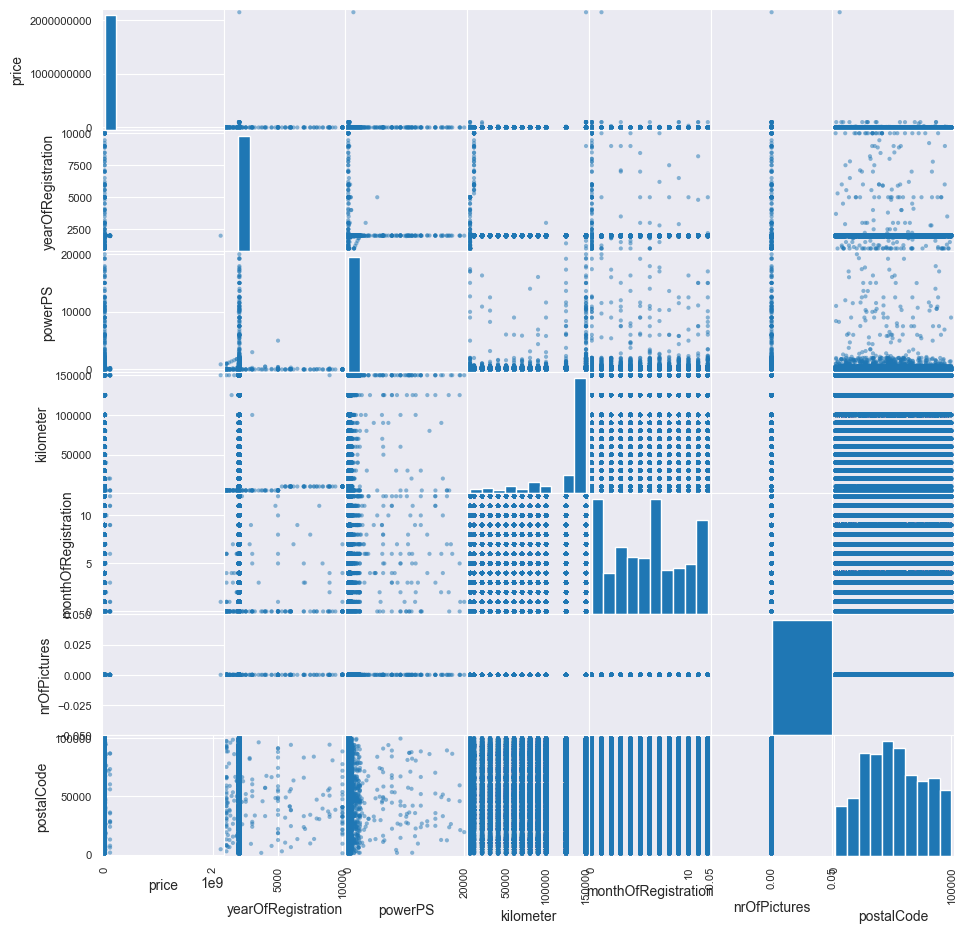

In [12]:
pd.plotting.scatter_matrix(df, figsize = (11, 11))

В общей диаграмме рассеяния уже видно, что есть какие-то выбросы:
в цене
в году регистрации

Почистим данные от выбросов, воспользуемся квантилями и IQR (интерквантильный диапазон)
уберем все, что за границами интерквантильного диапазона.

array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='powerPS'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='powerPS'>,
        <AxesSubplot: xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot: xlabel='kilometer', ylabel='powerPS'>],
       [<AxesSubplot: xlabel='price', ylabel='kilometer'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='kilometer'>,
        <AxesSubplot: xlabel='powerPS', ylabel='kilometer'>,
        <AxesSubplot: xlabel

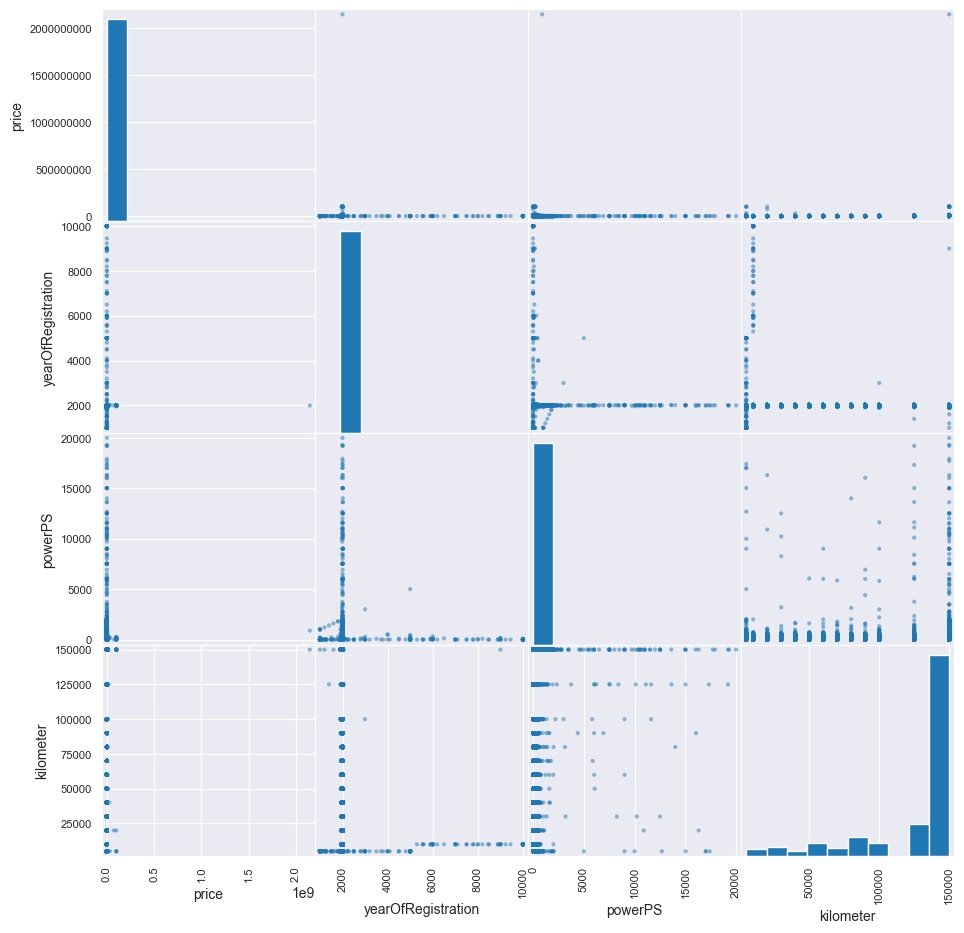

In [13]:
#исключим неиспользуемые признаки
exclude_column = ["nrOfPictures", "lastSeen", "dateCrawled", "name", "monthOfRegistration", "dateCreated", "postalCode", "seller", "offerType"]
new_df = df.drop(exclude_column, axis=1)

pd.plotting.scatter_matrix(new_df, figsize = (11, 11))

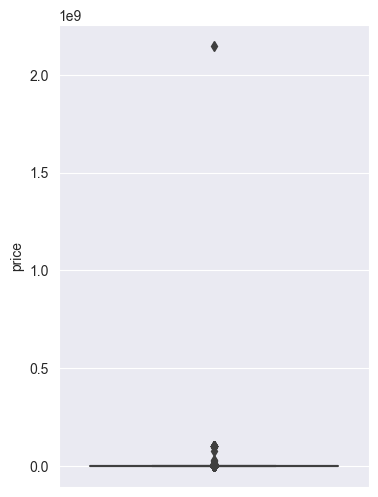

In [14]:
g=sns.boxplot(y='price', data=new_df)
g.figure.set_size_inches(4,6)

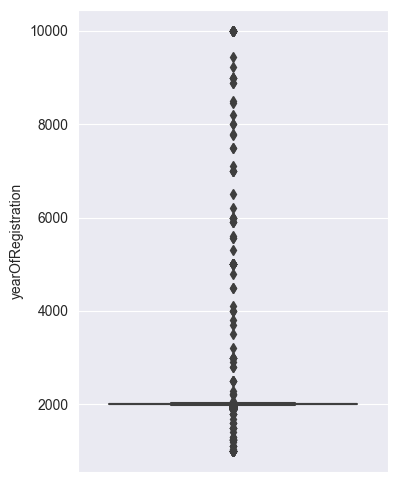

In [15]:
g=sns.boxplot(y='yearOfRegistration', data=new_df)
g.figure.set_size_inches(4,6)

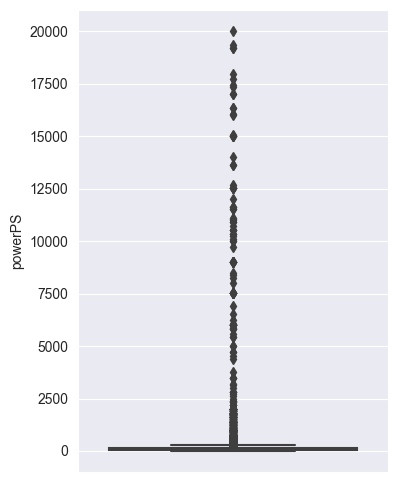

In [16]:
g=sns.boxplot(y='powerPS', data=new_df)
g.figure.set_size_inches(4,6)

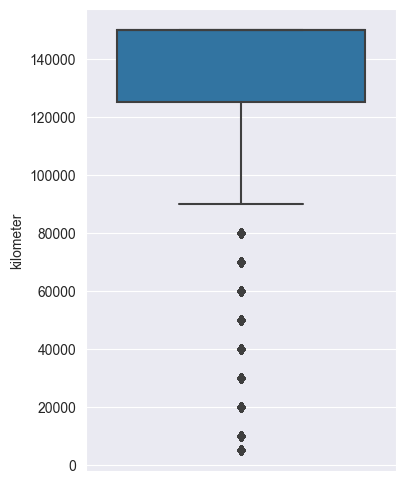

In [17]:
g=sns.boxplot(y='kilometer', data=new_df)
g.figure.set_size_inches(4,6)

In [18]:
Q1, Q3 = new_df['price'].quantile([.1, .9])
IQR = Q3 - Q1
price_lower = Q1 - 1.5*IQR
price_upper = Q3 + 1.5*IQR

print(price_lower)
print(price_upper)

Q1, Q3 = new_df['yearOfRegistration'].quantile([.1, .9])
IQR = Q3 - Q1
yearOfRegistration_lower = Q1 - 1.5*IQR
yearOfRegistration_upper = Q3 + 1.5*IQR

print(yearOfRegistration_lower)
print(yearOfRegistration_upper)

Q1, Q3 = new_df['powerPS'].quantile([.1, .9])
IQR = Q3 - Q1
powerPS_lower = Q1 - 1.5*IQR
powerPS_upper = Q3 + 1.5*IQR

print(powerPS_lower)
print(powerPS_upper)

Q1, Q3 = new_df['kilometer'].quantile([.1, .9])
IQR = Q3 - Q1
kilometer_lower = Q1 - 1.5*IQR
kilometer_upper = Q3 + 1.5*IQR

print(kilometer_lower)
print(kilometer_upper)


-19750.0
34250.0
1968.0
2040.0
-289.5
482.5
-75000.0
285000.0


In [19]:
rows_to_drop = new_df[
    (new_df['price'] < price_lower) | (new_df['price'] > price_upper) |
    (new_df['yearOfRegistration'] < yearOfRegistration_lower) | (new_df['yearOfRegistration'] > yearOfRegistration_upper) |
    (new_df['powerPS'] < powerPS_lower) | (new_df['powerPS'] > powerPS_upper) |
    (new_df['kilometer']  < kilometer_lower)  | (new_df['kilometer']  > kilometer_upper)].index

clean_df = new_df.drop(rows_to_drop)
clean_df.shape

(365154, 11)

Посмотрим на результат очистки от выбросов

In [20]:
new_df.describe()

price  yearOfRegistration        powerPS      kilometer
count  3.715280e+05       371528.000000  371528.000000  371528.000000
mean   1.729514e+04         2004.577997     115.549477  125618.688228
std    3.587954e+06           92.866598     192.139578   40112.337051
min    0.000000e+00         1000.000000       0.000000    5000.000000
25%    1.150000e+03         1999.000000      70.000000  125000.000000
50%    2.950000e+03         2003.000000     105.000000  150000.000000
75%    7.200000e+03         2008.000000     150.000000  150000.000000
max    2.147484e+09         9999.000000   20000.000000  150000.000000

In [21]:
clean_df.describe()

price  yearOfRegistration        powerPS      kilometer
count  365154.000000       365154.000000  365154.000000  365154.000000
mean     5128.230440         2003.467359     109.930254  126648.290858
std      5885.062633            7.110265      65.927772   39125.523789
min         0.000000         1968.000000       0.000000    5000.000000
25%      1100.000000         1999.000000      69.000000  125000.000000
50%      2900.000000         2003.000000     105.000000  150000.000000
75%      6950.000000         2008.000000     145.000000  150000.000000
max     34200.000000         2019.000000     481.000000  150000.000000

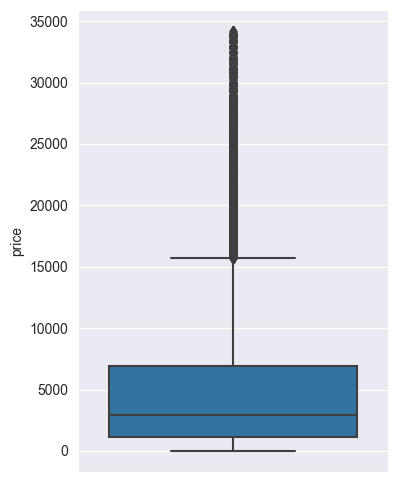

In [22]:
g=sns.boxplot(y='price', data=clean_df)
g.figure.set_size_inches(4,6)

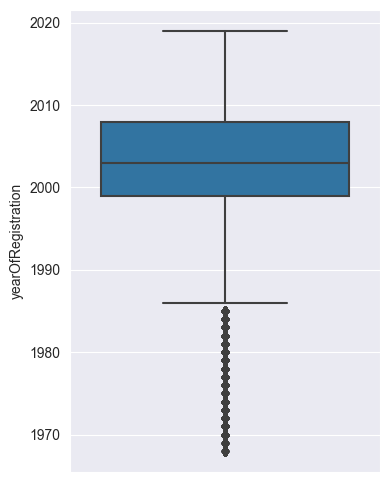

In [23]:
g=sns.boxplot(y='yearOfRegistration', data=clean_df)
g.figure.set_size_inches(4,6)

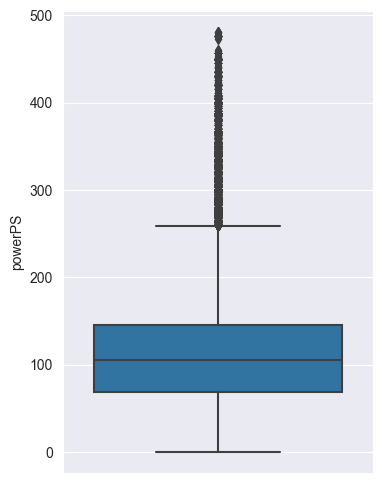

In [24]:
g=sns.boxplot(y='powerPS', data=clean_df)
g.figure.set_size_inches(4,6)

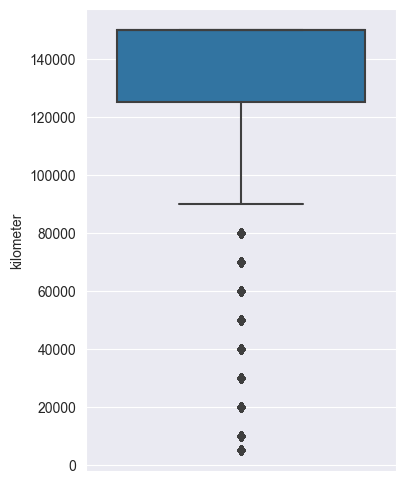

In [25]:
g=sns.boxplot(y='kilometer', data=clean_df)
g.figure.set_size_inches(4,6)

Похоже применение интерквантильного интервала тут, как надо не сработало.
Есть поля со значением 0.
Странная цена со значением 0, для нас такие значения не подходят
Так же и мощность авто с нулевым значением, не годится

Подрежем еще снизу.

In [26]:
clean_df['price'].quantile([0.005,.036,.05,.1,.5,.9,.95,.99,.995])

0.005        0.0
0.036      100.0
0.050      200.0
0.100      500.0
0.500     2900.0
0.900    13250.0
0.950    17900.0
0.990    27450.0
0.995    29900.0
Name: price, dtype: float64

In [27]:
clean_df['yearOfRegistration'].quantile([0.000,0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.000    1968.0
0.005    1977.0
0.010    1982.0
0.050    1993.0
0.100    1996.0
0.500    2003.0
0.900    2012.0
0.950    2016.0
0.990    2018.0
0.995    2018.0
Name: yearOfRegistration, dtype: float64

In [28]:
clean_df['powerPS'].quantile([.0, 0.005,.01,.101,.2,.5,.9,.95,.99,.995])

0.000      0.0
0.005      0.0
0.010      0.0
0.101      0.0
0.200     60.0
0.500    105.0
0.900    190.0
0.950    224.0
0.990    306.0
0.995    340.0
Name: powerPS, dtype: float64

In [29]:
clean_df['powerPS'].median()

105.0

In [30]:
clean_df['powerPS'].mean()

109.93025408457801

In [31]:
clean_df['kilometer'].quantile([.0, 0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.000      5000.0
0.005      5000.0
0.010      5000.0
0.050     30000.0
0.100     60000.0
0.500    150000.0
0.900    150000.0
0.950    150000.0
0.990    150000.0
0.995    150000.0
Name: kilometer, dtype: float64

Для столбца с ценой уберем 10% процентов нижних значений, что обрежет цену до значения 500 у.е.
С годом регистрации все выглядит хорошо
Мощность двигателя с 0 значением встречается слишком часто, заменим на медианное значение 105.0
Пробег выглядит тоже хорошо

In [32]:
rows_to_drop = clean_df[(clean_df['price'] < clean_df['price'].quantile(0.1))].index

clean_df = clean_df.drop(rows_to_drop)
clean_df.shape

(329501, 11)

In [33]:
median_powerPS = clean_df['powerPS'].median()
clean_df.loc[(clean_df['powerPS'] < clean_df['powerPS'].quantile(0.101)), 'powerPS'] = median_powerPS
clean_df.describe()

price  yearOfRegistration        powerPS      kilometer
count  329501.000000       329501.000000  329501.000000  329501.000000
mean     5662.142397         2003.852386     125.501789  126215.626053
std      5954.732397            6.934444      53.631904   38713.244097
min       500.000000         1968.000000      50.000000    5000.000000
25%      1500.000000         2000.000000      90.000000  125000.000000
50%      3450.000000         2004.000000     110.000000  150000.000000
75%      7600.000000         2008.000000     150.000000  150000.000000
max     34200.000000         2019.000000     481.000000  150000.000000

array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='powerPS'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='powerPS'>,
        <AxesSubplot: xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot: xlabel='kilometer', ylabel='powerPS'>],
       [<AxesSubplot: xlabel='price', ylabel='kilometer'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='kilometer'>,
        <AxesSubplot: xlabel='powerPS', ylabel='kilometer'>,
        <AxesSubplot: xlabel

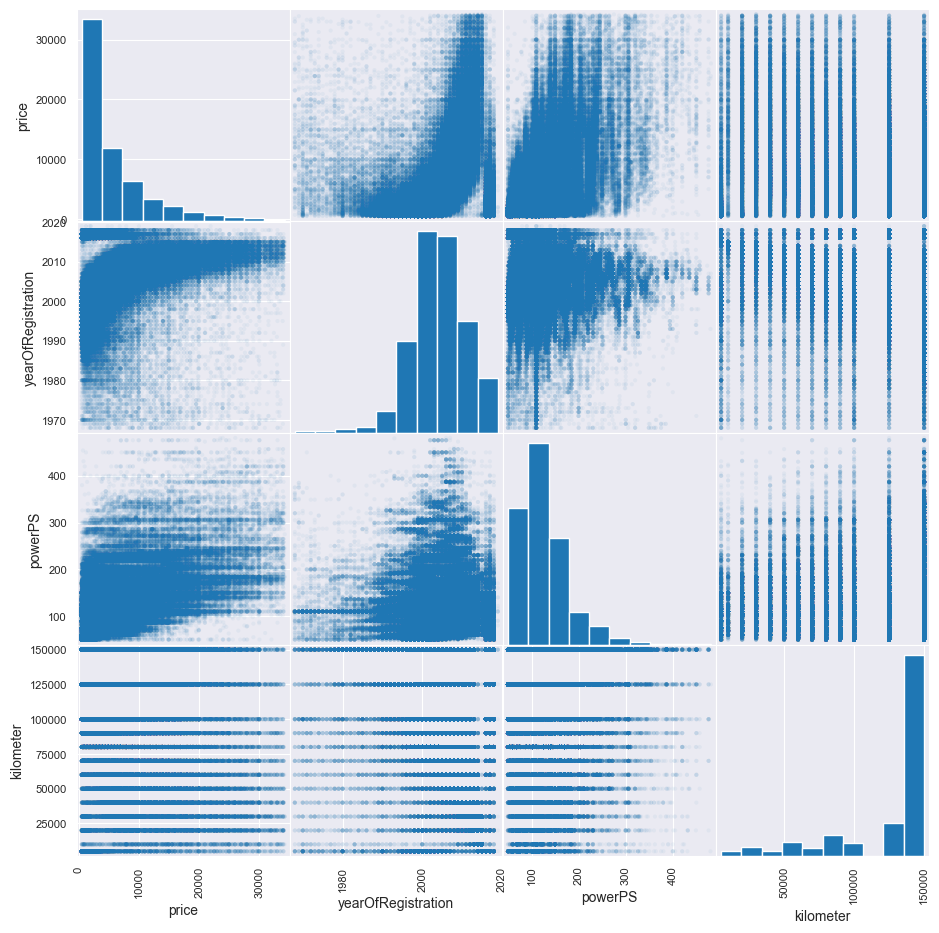

In [34]:
pd.plotting.scatter_matrix(clean_df, figsize = (11, 11), alpha=0.05)

Получаются красивые и чистые данные

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          371528 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              371528 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                371528 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

Посмотрим, сколько раз номинальные переменные принимают свои значения

In [36]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

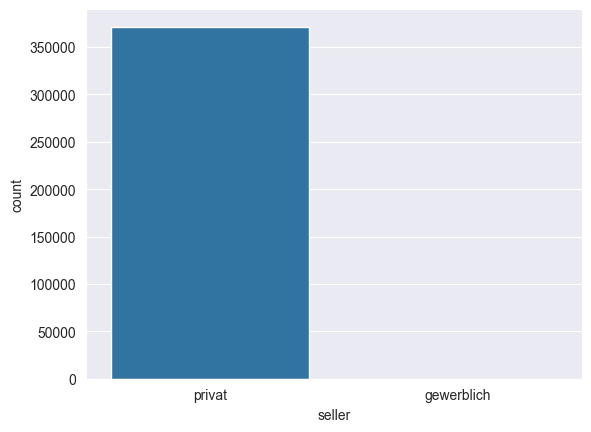

In [37]:
sns.countplot(x='seller', data=df, order=df['seller'].value_counts().index)
pass

In [38]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

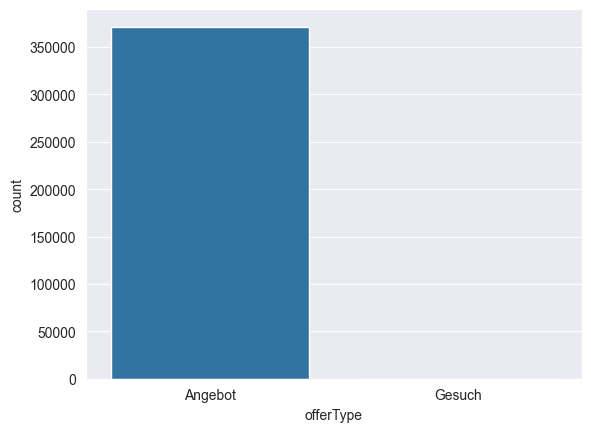

In [39]:
sns.countplot(x='offerType', data=df, order=df['offerType'].value_counts().index)
pass

In [40]:
df['vehicleType'].value_counts()

limousine     133763
kleinwagen     80023
kombi          67564
bus            30201
cabrio         22898
coupe          19015
suv            14707
andere          3357
Name: vehicleType, dtype: int64

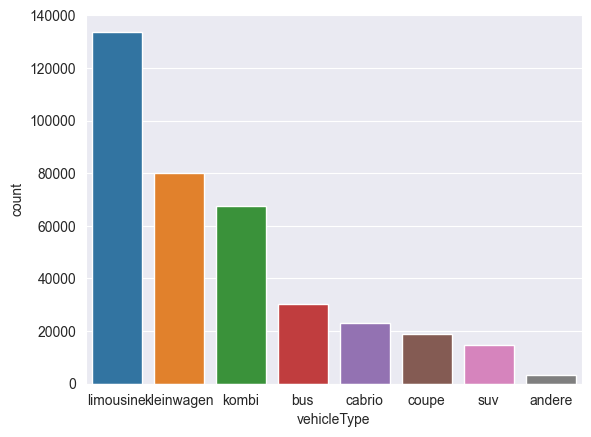

In [41]:
sns.countplot(x='vehicleType', data=df, order=df['vehicleType'].value_counts().index)
pass

In [42]:
df['gearbox'].value_counts()

manuell      294423
automatik     77105
Name: gearbox, dtype: int64

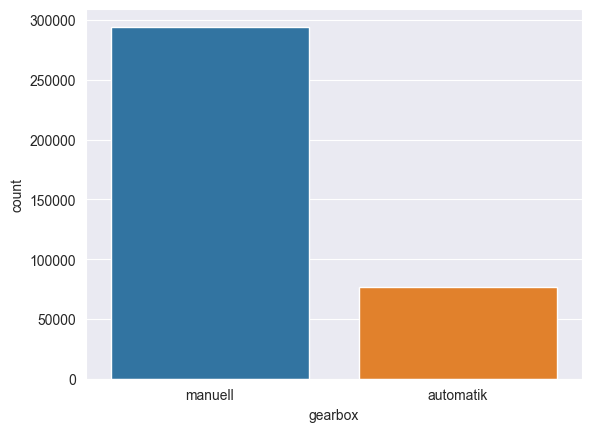

In [43]:
sns.countplot(x='gearbox', data=df, order=df['gearbox'].value_counts().index)
pass

In [44]:
df['monthOfRegistration'].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

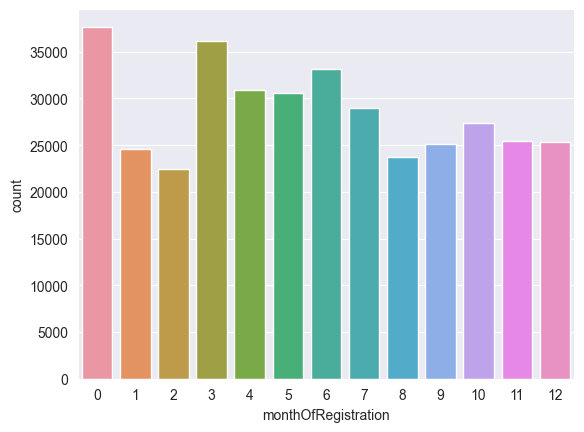

In [45]:
sns.countplot(x='monthOfRegistration', data=df)
pass

In [46]:
df['fuelType'].value_counts()

benzin     257243
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

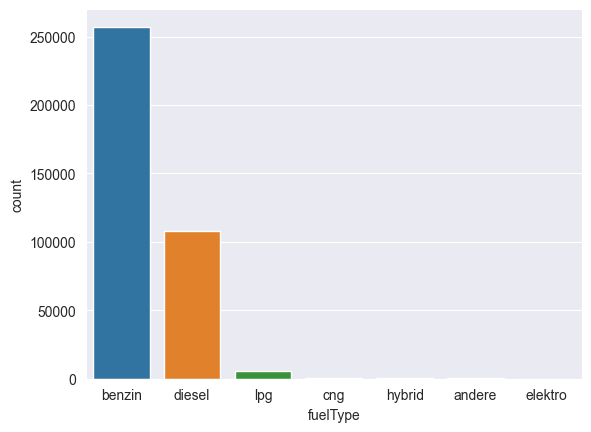

In [47]:
sns.countplot(x='fuelType', data=df, order=df['fuelType'].value_counts().index)
pass

In [48]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

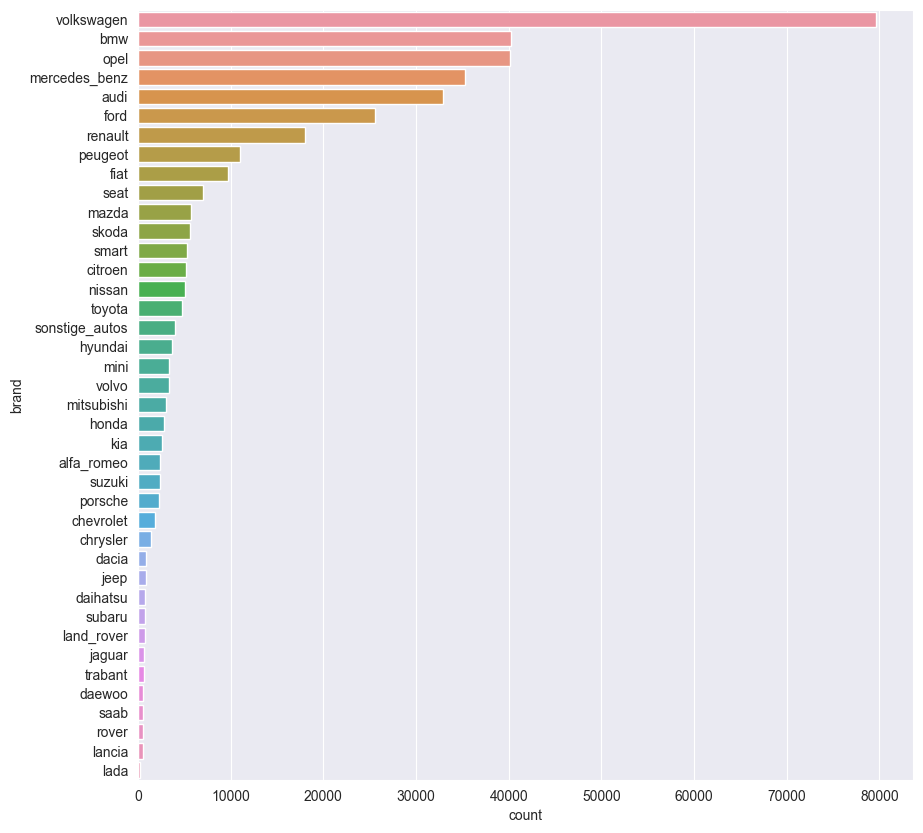

In [49]:
g=sns.countplot(data=df, y='brand', order=df['brand'].value_counts().index, width=0.8)
g.figure.set_size_inches(10,10)

Интересно на тему марок авто
датасет, судя по почтовым индексам, немецкий, но и там есть "lada" с небольшим представительством в 225 авто на продажу

In [50]:
df_lada = df.loc[df['brand'] == 'lada']
df_lada

dateCrawled                                               name  \
3240   2016-03-07 17:48:34                                    Lada_Volga_3102   
3496   2016-04-05 11:50:50  2xLada_Samara_Coupe_BJ_1991/1992_weiss/rot_199...   
4153   2016-03-31 14:55:36  seltener_Lada_Niva_mit_Saug_Diesel_Bj.1997_LKW...   
4603   2016-03-26 21:48:02        Lada_Shiguli_2101_DDR_Oldtimer_Scheunenfund   
5638   2016-03-22 01:47:20                     Lada_Niva_1700i_HU_BIS_08_2017   
...                    ...                                                ...   
366452 2016-03-05 14:17:05                                     Lada_Niva_1.7i   
367026 2016-03-26 19:53:50                    Lada_Niva_4x4__Allrad__HU_11/17   
369930 2016-03-09 22:52:37                                Lada_Niva_1.7i_Kult   
370680 2016-03-07 21:59:03  Lada_2108_Funkstreifenwagen_Miliz_keine_Volksp...   
370715 2016-03-31 19:38:55                                Lada_Priora_1_6_LPG   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
3240    privat   Angebot   8400     test   limousine                2007   
3496    privat   Angebot    199     test   limousine                1995   
4153    privat   Angebot   2500  control         suv                1997   
4603    privat   Angebot   1350  control   limousine                1980   
5638    privat   Angebot   2500     test         suv                2002   
...        ...       ...    ...      ...         ...                 ...   
366452  privat   Angebot   3666     test         suv                2008   
367026  privat   Angebot   4500  control         suv                2007   
369930  privat   Angebot   2850     test         suv                2009   
370680  privat   Angebot   2199  control   limousine                2016   
370715  privat   Angebot   2800  control       kombi                2011   

        gearbox  powerPS   model  kilometer  monthOfRegistration fuelType  \
3240    manuell      137  andere     100000                    4   benzin   
3496    manuell        0  samara     100000                    0   benzin   
4153    manuell       64    niva     150000                    2   diesel   
4603    manuell        0  andere      50000                    0   benzin   
5638    manuell        0    niva      70000                    0   benzin   
...         ...      ...     ...        ...                  ...      ...   
366452  manuell       82    niva      80000                    2   benzin   
367026  manuell       82    niva      50000                    7   benzin   
369930  manuell       82    niva      90000                    6   benzin   
370680  manuell        0  samara      70000                    0   benzin   
370715  manuell        0  andere      90000                   11      lpg   

       brand notRepairedDamage dateCreated  nrOfPictures  postalCode  \
3240    lada              nein  2016-03-07             0       88214   
3496    lada              nein  2016-04-05             0       14774   
4153    lada                ja  2016-03-31             0        1683   
4603    lada              nein  2016-03-26             0       17034   
5638    lada              nein  2016-03-21             0        9432   
...      ...               ...         ...           ...         ...   
366452  lada              nein  2016-03-04             0       35638   
367026  lada              nein  2016-03-26             0       83487   
369930  lada              nein  2016-03-09             0       73547   
370680  lada              nein  2016-03-07             0        1796   
370715  lada              nein  2016-03-31             0       12627   

                  lastSeen  
3240   2016-04-06 12:44:24  
3496   2016-04-05 11:50:50  
4153   2016-04-06 08:16:51  
4603   2016-04-06 13:16:30  
5638   2016-04-05 13:17:12  
...                    ...  
366452 2016-03-07 12:17:35  
367026 2016-04-06 10:45:34  
369930 2016-03-12 14:15:40  
370680 2016-03-08 13:16:48  
370715 2016-04-02 15

In [51]:
df_lada['model'].value_counts()

niva       129
andere      59
unknown     15
samara      13
kalina       9
Name: model, dtype: int64

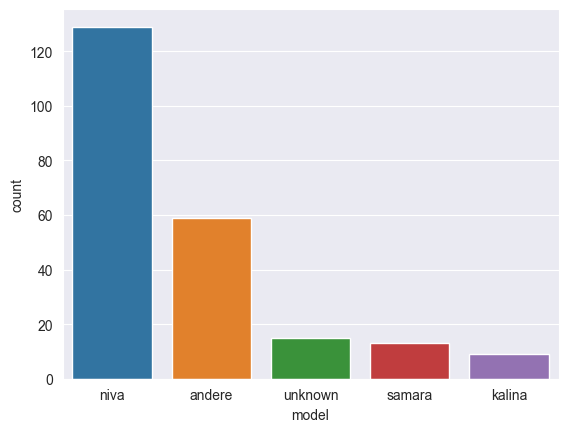

In [52]:
sns.countplot(x='model', data=df_lada, order=df_lada['model'].value_counts().index)
pass

Ниву - любят)))

In [53]:
df['notRepairedDamage'].value_counts()

nein    335242
ja       36286
Name: notRepairedDamage, dtype: int64

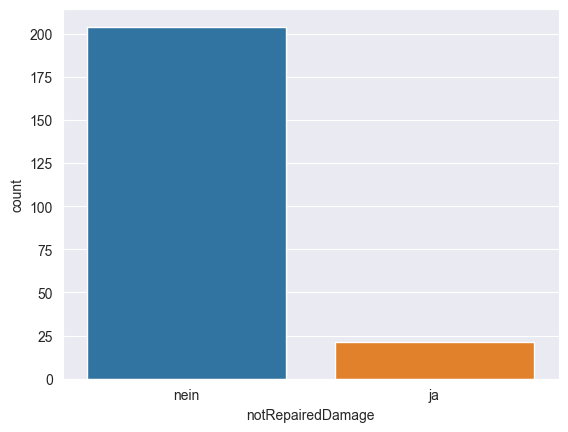

In [54]:
sns.countplot(x='notRepairedDamage', data=df_lada, order=df_lada['notRepairedDamage'].value_counts().index)
pass

In [55]:
corr_mat = clean_df.corr()
corr_mat

C:\Users\user\AppData\Local\Temp\ipykernel_17036\3699998644.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



price  yearOfRegistration   powerPS  kilometer
price               1.000000            0.412568  0.538387  -0.433111
yearOfRegistration  0.412568            1.000000  0.103257  -0.278926
powerPS             0.538387            0.103257  1.000000   0.037538
kilometer          -0.433111           -0.278926  0.037538   1.000000

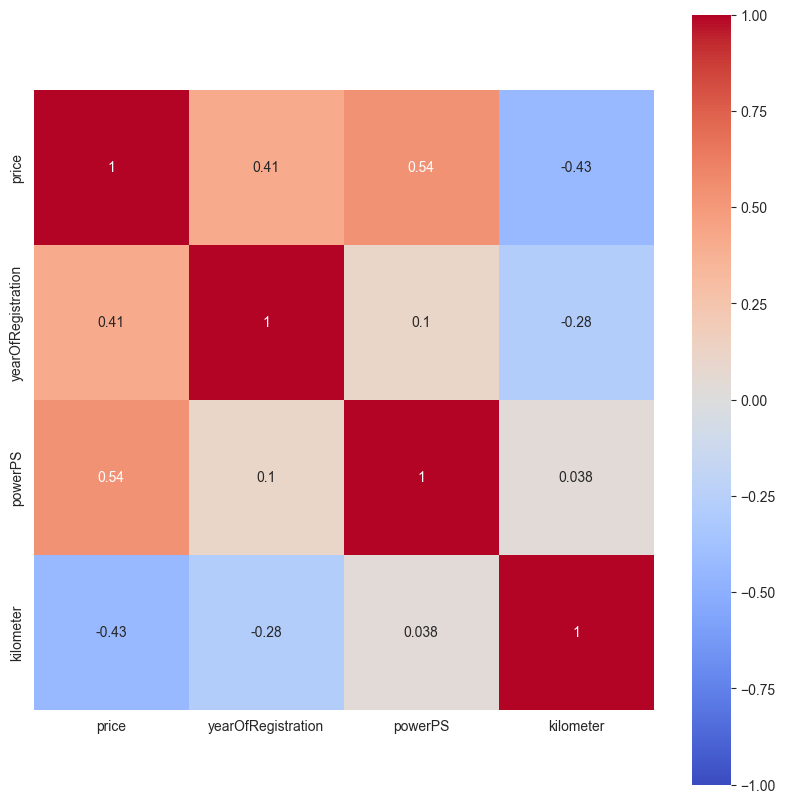

In [56]:
g=sns.heatmap(corr_mat, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
g.figure.set_size_inches(10,10)
pass

На корреляционной матрице видно, что год регистрации и мощность двигателя значительно влияют на цену.
Пробег, как и следовало ожидать, на цену влияет со знаком минус.

In [57]:
categorical_columns =   ["notRepairedDamage",
                        "vehicleType",
                        "abtest",
                        "gearbox",
                        "model",
                        "fuelType",
                        "brand"]

encoder = LabelEncoder()
encoded_df = clean_df.copy()
encoded_df[categorical_columns] = encoded_df[categorical_columns].apply(encoder.fit_transform)
corr = encoded_df.corr()

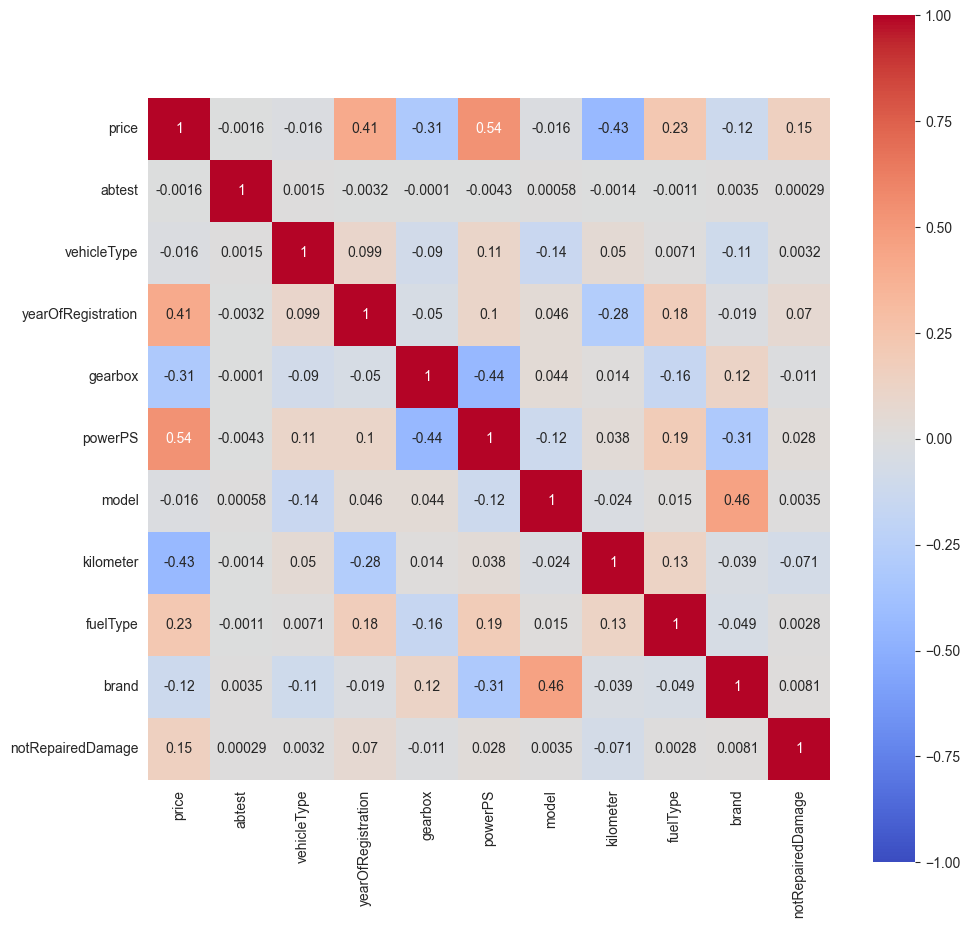

In [58]:
g=sns.heatmap(corr, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
g.figure.set_size_inches(11,11)

В расширенном варианте с категориальными признаками мы видим, что на цену --->
коробка передач оказывает влияние
тип топлива
в меньшей степени бренд и неустраненные неисправности

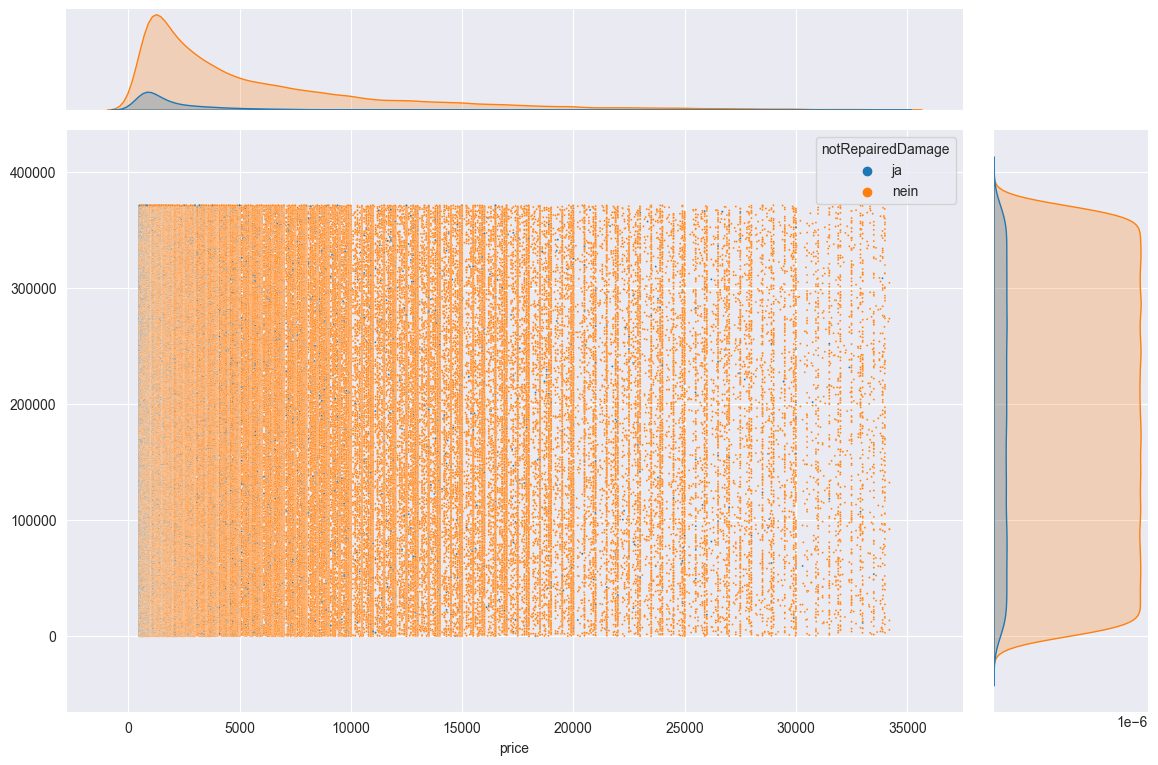

In [59]:
g=sns.jointplot(data=clean_df, x="price", y=clean_df.index, hue="notRepairedDamage", alpha=1, s=2)
g.figure.set_size_inches(12, 8)

Как и предполагается интуитивно, авто без повреждений или уже отремонтированные имеют более высокую цену

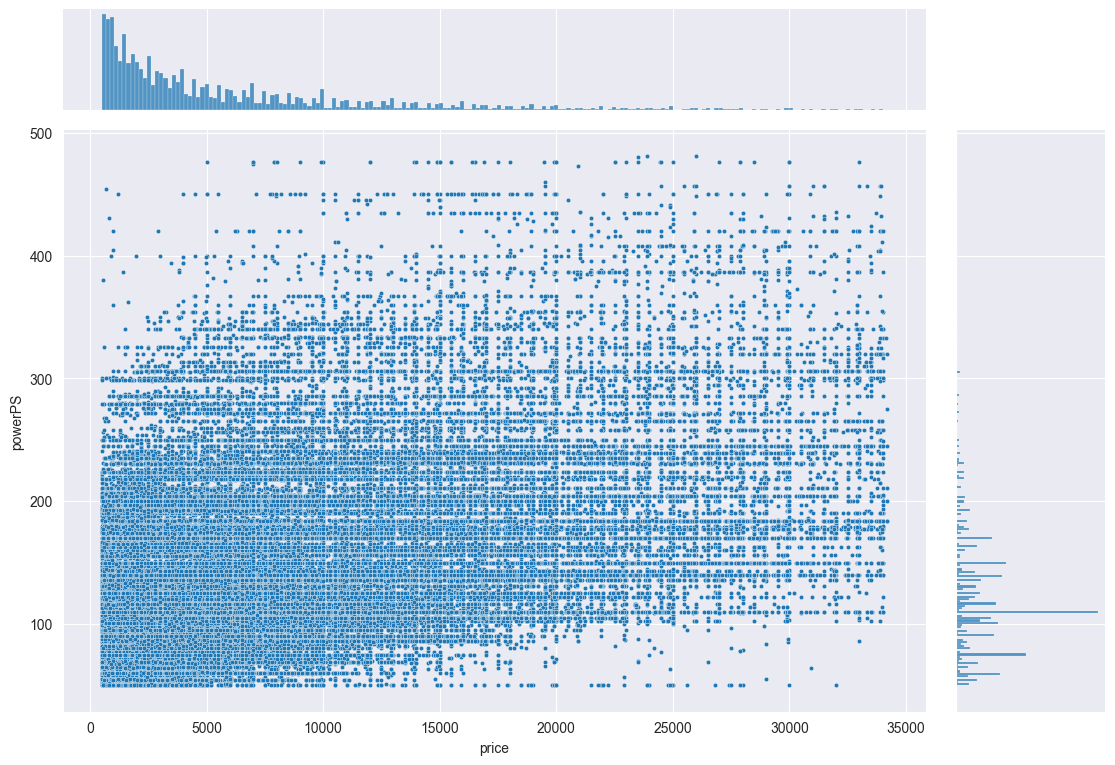

In [60]:
g=sns.jointplot(data=clean_df, x="price", y="powerPS", alpha=1, s=10)
g.figure.set_size_inches(12, 8)

Из графика видно сто существует небольшая положительная связь с тем, что более мощные автомобили стоят дороже

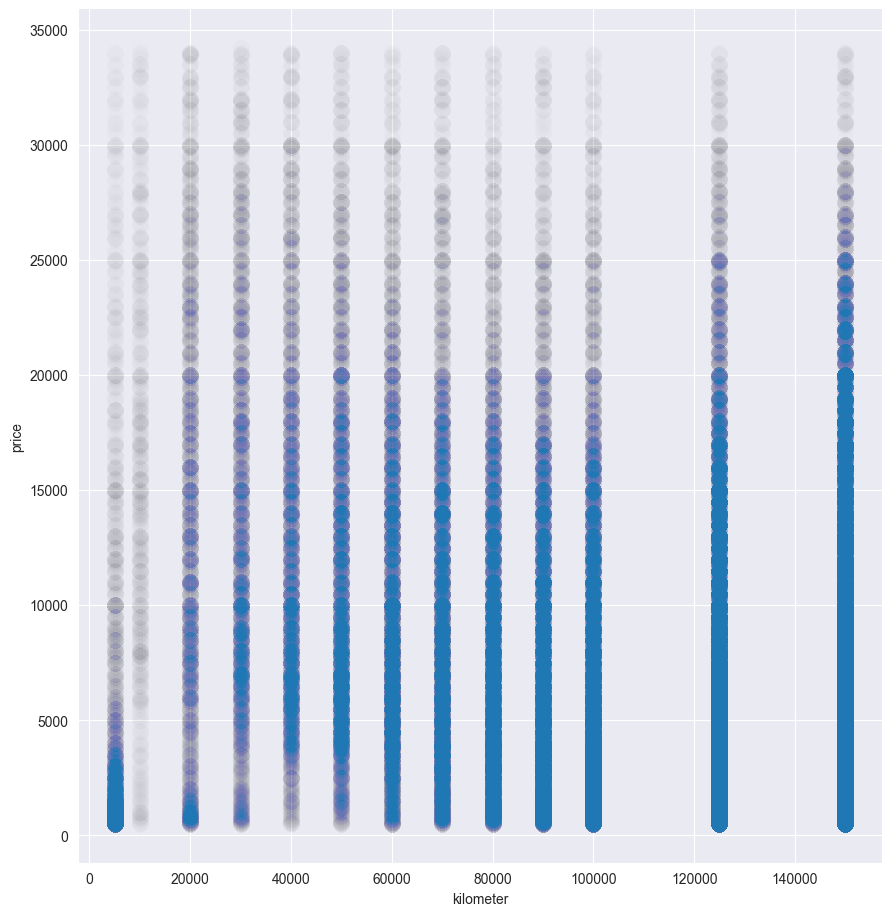

In [61]:
g=sns.relplot(data=clean_df, x="kilometer", y="price", alpha=0.002, s=150)
g.figure.set_size_inches(10, 10)

На таком графике сложно что-то сказать
Но попробуем что-то другое

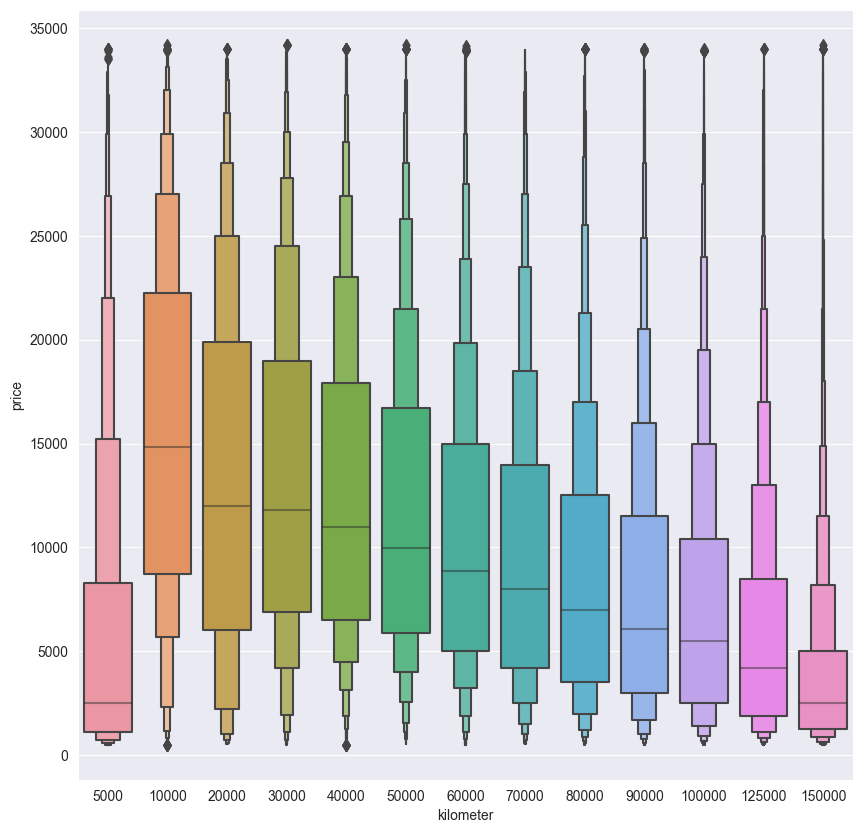

In [62]:
g=sns.boxenplot(data=clean_df, x="kilometer", y="price")
g.figure.set_size_inches(10, 10)

И тут мы уже видим, что с ростом пробега авто цена уменьшается

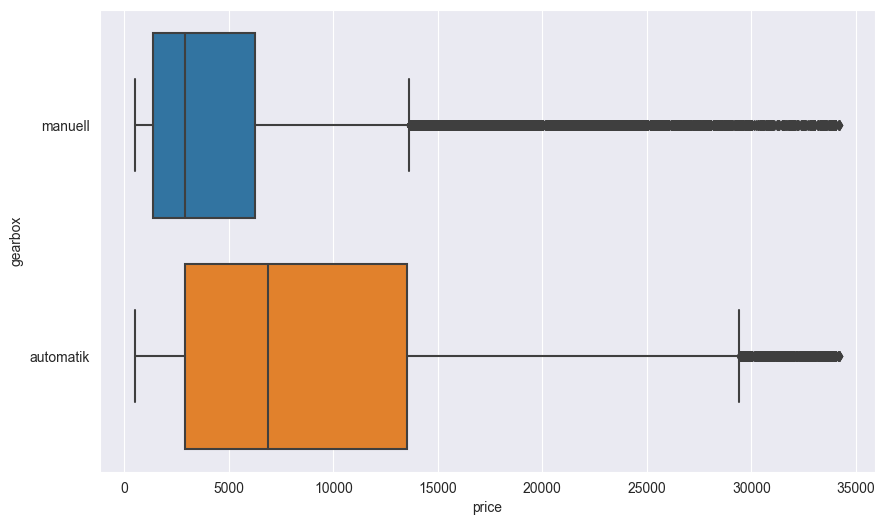

In [63]:
g=sns.boxplot(data=clean_df, x="price", y="gearbox")
g.figure.set_size_inches(10, 6)

В целом автомобили с автоматической коробкой передач стоят дороже

In [64]:
top_from_mean_price = clean_df["price"].groupby(clean_df["brand"]).agg(["sum", "count", "mean"]).sort_values(by = "mean", ascending=False)
top_from_mean_price

sum  count          mean
brand                                         
porsche          19564484   1100  17785.894545
land_rover        7963580    651  12232.841782
mini             33148319   3325   9969.419248
jeep              6849782    719   9526.817803
jaguar            4932340    540   9133.962963
sonstige_autos   21030496   2528   8319.025316
audi            249888856  30212   8271.178869
bmw             293873643  37266   7885.838110
mercedes_benz   249899105  33120   7545.262832
skoda            35673486   5437   6561.244436
chevrolet        10915247   1701   6416.958848
kia              14339180   2408   5954.808970
dacia             5253038    886   5928.936795
hyundai          19632826   3451   5689.025210
volkswagen      390445444  71103   5491.265404
volvo            15892670   2978   5336.692411
toyota           23746697   4529   5243.253919
nissan           22139382   4416   5013.447011
seat             30099493   6262   4806.690035
subaru            3113667    652   4775.562883
mazda            22106090   5071   4359.315717
suzuki            9017905   2094   4306.544890
alfa_romeo        8833941   2065   4277.937530
chrysler          5374222   1279   4201.893667
honda            10578566   2558   4135.483190
saab              2016877    490   4116.075510
ford             85207517  21288   4002.607901
citroen          18139767   4643   3906.906526
mitsubishi        9537837   2587   3686.833011
smart            18255972   5102   3578.199138
peugeot          34570245   9963   3469.862993
lancia            1328837    388   3424.837629
lada               681278    205   3323.307317
opel            111659764  33648   3318.466595
fiat             25898298   8086   3202.856542
renault          40697852  14990   2715.000133
trabant            829044    354   2341.932203
daihatsu          1320893    613   2154.800979
rover              709127    377   1880.973475
daewoo             515815    416   1239.939904

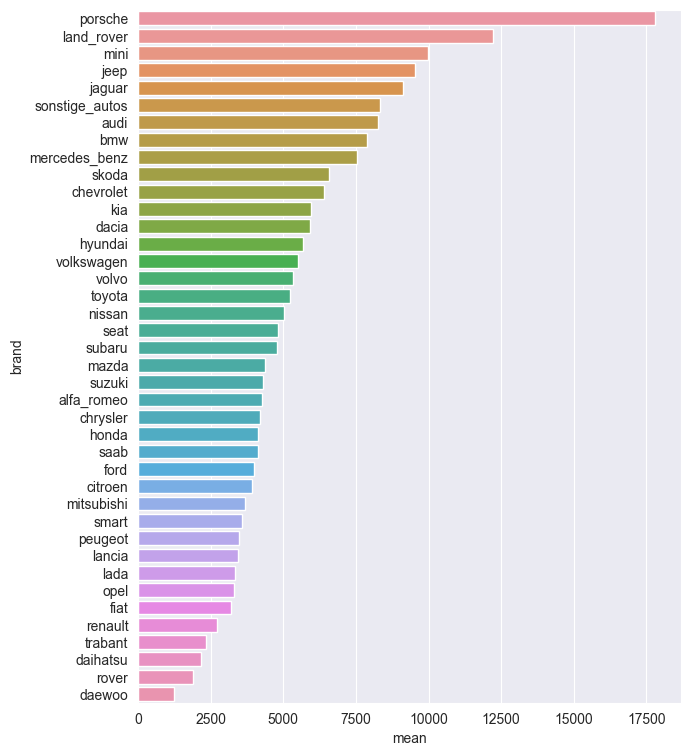

In [65]:
g=sns.barplot(y=top_from_mean_price.index, x='mean', data=top_from_mean_price)
g.figure.set_size_inches(7, 9)

График самых дорогих марок авто,
судя по всему, в 2016 году такие бренды, как porsche, land_rover, mini в среднем продавались дороже, чем иные марки

Переходим к моделированию

Данные необходимо разделить на обучающую и тестовую выборки

In [66]:
#для начала, разделим датасет на X=Входы и y=Выходы,
X = pd.DataFrame(encoded_df.drop("price", axis = 1).values, columns=encoded_df.drop("price", axis = 1).columns, index=encoded_df.index)
y = pd.DataFrame(encoded_df["price"].values, columns=['price'], index=encoded_df.index)

In [67]:
#Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
print(f"Train Shape : {X_train.shape} --------- Test Shape : {X_test.shape}")

Train Shape : (263600, 10) --------- Test Shape : (65901, 10)


Масштабирование данных

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
#Для корректного тестирования масштабы возьмем обученные на тренировочных данных
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [69]:
#далее для вычисления метрик будем пользоваться собраной функцией
def calc_mertrics(y_train, y_train_pred, y_test, y_test_pred):

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    RMSE_train = mean_squared_error(y_train, y_train_pred)**0.5
    RMSE_test = mean_squared_error(y_test, y_test_pred)**0.5

    return R2_train, R2_test, RMSE_train, RMSE_test

summary_chart = pd.DataFrame(columns=('train R^2', 'test R^2', 'train RMSE', 'test RMSE'))
summary_chart

Empty DataFrame
Columns: [train R^2, test R^2, train RMSE, test RMSE]
Index: []

Линейная регрессия

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
model.coef_

array([[    3.98967093,  -451.44796635,  1355.0634262 ,  -367.73015474,
         2913.25410215,    25.10610601, -2337.95075231,   802.40044431,
          115.5799733 ,   542.60861112]])

In [72]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [73]:
metrics_val = calc_mertrics(y_train, y_train_predict, y_test, y_test_predict)
summary_chart.loc['Linear Regression', :] = metrics_val

In [74]:
#summary_chart.style.format({'Profit': '{:.2f}'})
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_chart

train R^2   test R^2    train RMSE     test RMSE
Linear Regression 0.58932688 0.58756880 3818.24404926 3815.20658727

Метод k ближайших соседей (kNN)

In [75]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [76]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [77]:
metrics_val = calc_mertrics(y_train, y_train_predict, y_test, y_test_predict)
summary_chart.loc['k nearest neighbours', :] = metrics_val

In [78]:
summary_chart

train R^2   test R^2    train RMSE     test RMSE
Linear Regression    0.58932688 0.58756880 3818.24404926 3815.20658727
k nearest neighbours 0.89634754 0.84590048 1918.25066570 2332.07735395

Полносвязная нейронная сеть или многослойный перцептрон

In [79]:
model = MLPRegressor(hidden_layer_sizes=(64,128,256), verbose=1)
model.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Iteration 1, loss = 7960052.69894218
Iteration 2, loss = 5541219.05827562
Iteration 3, loss = 5284859.70641125
Iteration 4, loss = 5064315.36702825
Iteration 5, loss = 4717067.39995628
Iteration 6, loss = 4366674.71615584
Iteration 7, loss = 3869825.58637086
Iteration 8, loss = 3650249.74405041
Iteration 9, loss = 3509321.80345148
Iteration 10, loss = 3373376.09336104
Iteration 11, loss = 3281753.19110870
Iteration 12, loss = 3218593.59240081
Iteration 13, loss = 3155468.71160131
Iteration 14, loss = 3101071.86186707
Iteration 15, loss = 3056721.14500843
Iteration 16, loss = 3009660.26815139
Iteration 17, loss = 2975463.17715940
Iteration 18, loss = 2944369.13059432
Iteration 19, loss = 2924513.48252535
Iteration 20, loss = 2899760.71630226
Iteration 21, loss = 2881276.42161671
Iteration 22, loss = 2861414.88825185
Iteration 23, loss = 2847332.01556745
Iteration 24, loss = 2840190.69437728
Iteration 25, loss = 2829445.31835935
Iteration 26, loss = 2818712.55929847
Iteration 27, loss = 

C:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor(hidden_layer_sizes=(64, 128, 256), verbose=1)

In [80]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [81]:
metrics_val = calc_mertrics(y_train, y_train_predict, y_test, y_test_predict)
summary_chart.loc['Fully connected neural network', :] = metrics_val

In [82]:
summary_chart

train R^2   test R^2    train RMSE  \
Linear Regression              0.58932688 0.58756880 3818.24404926   
k nearest neighbours           0.89634754 0.84590048 1918.25066570   
Fully connected neural network 0.88142343 0.86903135 2051.70529888   

                                   test RMSE  
Linear Regression              3815.20658727  
k nearest neighbours           2332.07735395  
Fully connected neural network 2149.93823810

Случайный лес (Random Forest)

In [83]:
model = RandomForestRegressor(n_estimators=200, verbose=1)
model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_17036\3149911075.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.1min finished


RandomForestRegressor(n_estimators=200, verbose=1)

In [84]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.9s finished


In [85]:
metrics_val = calc_mertrics(y_train, y_train_predict, y_test, y_test_predict)
summary_chart.loc['Random Forest', :] = metrics_val

In [86]:
summary_chart

train R^2   test R^2    train RMSE  \
Linear Regression              0.58932688 0.58756880 3818.24404926   
k nearest neighbours           0.89634754 0.84590048 1918.25066570   
Fully connected neural network 0.88142343 0.86903135 2051.70529888   
Random Forest                  0.96730618 0.89117794 1077.32906643   

                                   test RMSE  
Linear Regression              3815.20658727  
k nearest neighbours           2332.07735395  
Fully connected neural network 2149.93823810  
Random Forest                  1959.75043099

In [87]:
importances = model.feature_importances_
importances

array([0.00715932, 0.03105392, 0.43809329, 0.00916066, 0.31586093,
       0.04033091, 0.10417989, 0.00847053, 0.03750116, 0.00818938])

In [88]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

yearOfRegistration   0.43809329
powerPS              0.31586093
kilometer            0.10417989
model                0.04033091
brand                0.03750116
vehicleType          0.03105392
gearbox              0.00916066
fuelType             0.00847053
notRepairedDamage    0.00818938
abtest               0.00715932
dtype: float64

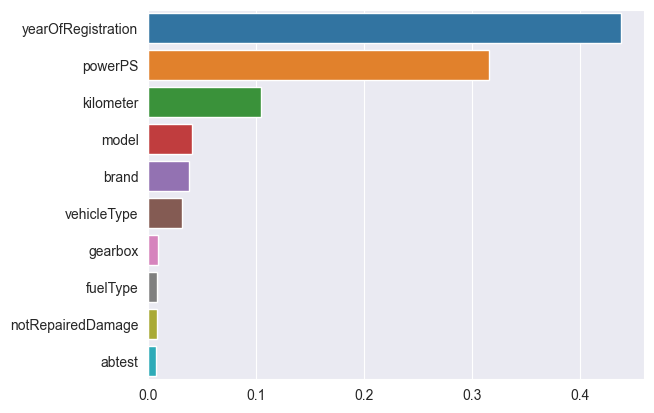

In [89]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

XGBoost

In [90]:
model = xgb.XGBRegressor(tree_method="hist", n_estimators = 1001, verbose=1)
model.fit(X_train, y_train)

[22:23:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1001, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [91]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [92]:
metrics_val = calc_mertrics(y_train, y_train_predict, y_test, y_test_predict)
summary_chart.loc['XGBoost', :] = metrics_val

In [93]:
summary_chart

train R^2   test R^2    train RMSE  \
Linear Regression              0.58932688 0.58756880 3818.24404926   
k nearest neighbours           0.89634754 0.84590048 1918.25066570   
Fully connected neural network 0.88142343 0.86903135 2051.70529888   
Random Forest                  0.96730618 0.89117794 1077.32906643   
XGBoost                        0.93922927 0.89999223 1468.80034905   

                                   test RMSE  
Linear Regression              3815.20658727  
k nearest neighbours           2332.07735395  
Fully connected neural network 2149.93823810  
Random Forest                  1959.75043099  
XGBoost                        1878.70750862

In [94]:
importances = model.feature_importances_
importances

array([0.00588781, 0.05516636, 0.31211245, 0.05092547, 0.2440249 ,
       0.02675812, 0.12629174, 0.04957737, 0.06099093, 0.06826486],
      dtype=float32)

In [95]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

yearOfRegistration   0.31211245
powerPS              0.24402490
kilometer            0.12629174
notRepairedDamage    0.06826486
brand                0.06099093
vehicleType          0.05516636
gearbox              0.05092547
fuelType             0.04957737
model                0.02675812
abtest               0.00588781
dtype: float32

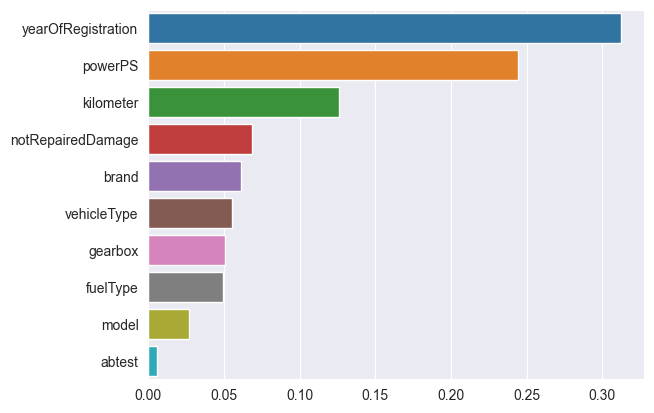

In [96]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Для модели kNN сделаем подбор гиперпараметра n_neighbors

In [97]:
model = KNeighborsRegressor()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [98]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50])

params = {'n_neighbors': k_arr,}

GridSearch = GridSearchCV(model, params, cv=5, verbose=2)
GridSearch.fit(X_train, y_train)

GridSearch.best_score_, GridSearch.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................................n_neighbors=1; total time=   5.6s
[CV] END ......................................n_neighbors=1; total time=   5.8s
[CV] END ......................................n_neighbors=1; total time=   5.7s
[CV] END ......................................n_neighbors=1; total time=   5.5s
[CV] END ......................................n_neighbors=1; total time=   5.4s
[CV] END ......................................n_neighbors=2; total time=   6.4s
[CV] END ......................................n_neighbors=2; total time=   6.9s
[CV] END ......................................n_neighbors=2; total time=   6.5s
[CV] END ......................................n_neighbors=2; total time=   6.3s
[CV] END ......................................n_neighbors=2; total time=   6.3s
[CV] END ......................................n_neighbors=3; total time=   7.5s
[CV] END ......................................n

(0.8387428914701749, {'n_neighbors': 7})

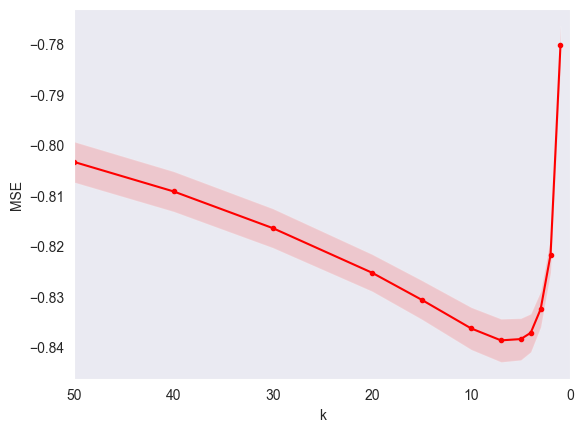

In [99]:
MSE_arr = -GridSearch.cv_results_['mean_test_score']
std_arr = GridSearch.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

In [100]:
model.set_params(n_neighbors=GridSearch.best_params_['n_neighbors'])
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [101]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [108]:
metrics_val = calc_mertrics(y_train, y_train_predict, y_test, y_test_predict)
summary_chart.loc['kNN с подбором n_neighbors', :] = metrics_val

In [109]:
summary_chart

train R^2   test R^2    train RMSE  \
Linear Regression              0.58932688 0.58756880 3818.24404926   
k nearest neighbours           0.89634754 0.84590048 1918.25066570   
Fully connected neural network 0.88142343 0.86903135 2051.70529888   
Random Forest                  0.96730618 0.89117794 1077.32906643   
XGBoost                        0.93922927 0.89999223 1468.80034905   
kNN с подбором n_neighbors     0.88411912 0.84514269 2028.24978550   

                                   test RMSE  
Linear Regression              3815.20658727  
k nearest neighbours           2332.07735395  
Fully connected neural network 2149.93823810  
Random Forest                  1959.75043099  
XGBoost                        1878.70750862  
kNN с подбором n_neighbors     2337.80435580

Вывод:

    По порядку
    Решена задача регрессии для датасета подержанных автомобилей
    восстановление регрессии для 'price' - цены автомобиля.

    последовательно обрабатывая и анализируя, данные подготовлены для моделирования на алгоритмах машинного обучения
        1) какие шаги были применены для достижения цели:
            1. Загрузка данных
            2. Текстовое описание
            3. Работа с пропущенными значениями, максимально имелись поля в которых отсутствавало 19% значений.
                применено для некоторых категориальных полей, устновлено чаще встречающееся значения
                для поля модель, введена дополнительная категория неизвестное значение
            4. Выбросы
                Числовые значения проанализированы. Убраны поля не вошедшие во внутрикантильный диапазон
                Нижние значения дополнительно еще удалены, например: для цены или мощности двигателя встречались значения равные 0
                и такие значения мы не хотели бы рассматривать в анализе
            5. Ряд полей были закодированы, как категории
            6. Работа сопровождалась обильным визуализированием и комментариями, что помогает определить природу взаимосвязей между данными
        2) Моделирование
            1. Данные разделены на обучающую и тестовую выборки
            2. Данные смасштабированы
            3. Обучен ряд моделей по алгоритмам машинного обучения:

               Linear Regression
               kNN
               MLP
               Random Forest
               XGBoost

               для kNN произведен подбор гиперматаметра n_neighbors

            4. Модели оцениваются метриками R^2 score, RMSE
            5. Данные занесены в сводную таблицу

        для алгоритмов Random Forest, XGBoost можно увидеть важность признаков влияющих на цену автомобиля, а именно:
        год регистрации, мощность двигателя, пробег авто, отсутствие повреждений

        Для текущих параметров моделей лидерами стали Random Forest, XGBoost
        с метриками качества R^2 score = 0.89 и RMSE = 1900

        Благодарю за внимание!
        Обратная связь - приветствуется.





